In [1]:
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
from scipy.stats import pearsonr, spearmanr
import scipy
import os
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import statsmodels.api as sm
import acquire
import prepare

In [2]:
# retrive original data set from aquire.py 
df = acquire.get_zillow_data()

In [3]:
#original shape of combined (Properties_2017, Predictions_2017, Propertylandusetype) from zillow data set.
df.shape
df

,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc
0,261.0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential
1,261.0,17052889,1387261,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential
2,261.0,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential
3,261.0,12177905,2288172,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential
4,261.0,12095076,781532,1.0,NaN,NaN,3.0,4.0,NaN,9.0,...,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,261.0,11000655,673515,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13,77609,0.020615,2017-09-20,Single Family Residential
52438,261.0,17239384,2968375,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13,77610,0.013209,2017-09-21,Single Family Residential
52439,261.0,12773139,1843709,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13,77611,0.037129,2017-09-21,Single Family Residential
52440,261.0,12826780,1187175,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13,77612,0.007204,2017-09-25,Single Family Residential


# time to clean the data

In [7]:
df = prepare.clean_zillow_data(df)

In [8]:
df.latitude.max()

34818767.0

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

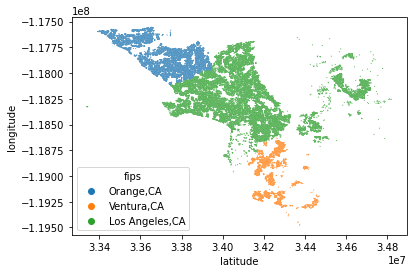

In [9]:
sns.scatterplot(df.latitude, df.longitude, s=1, hue=df.fips)

In [10]:
df.bathroomcnt.value_counts()

2.0     21886
3.0     10669
1.0      9544
2.5      3933
4.0      2227
3.5       918
1.5       840
5.0       802
4.5       686
6.0       322
5.5       224
7.0        88
8.0        53
6.5        47
7.5        16
9.0        13
10.0        5
11.0        3
8.5         3
18.0        1
13.0        1
Name: bathroomcnt, dtype: int64

In [11]:
df.bedroomcnt.value_counts()

3.0     23353
4.0     15236
2.0      8334
5.0      3972
6.0       635
1.0       606
7.0       106
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedroomcnt, dtype: int64

In [ ]:
df.tota